In [1]:
# Packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore') 

import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.model_selection import train_test_split

import lightgbm as lgb

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data = pd.DataFrame(np.c_[data.data, data.target], columns = data.feature_names + ['MedianHouseValue'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
response = data.columns[-1] # last column in the dataframe
predictors= list(data.columns[:-1]) # all columns except the last
    
index_train, index_valid  = train_test_split(np.array(data.index), train_size = 0.2, random_state=1)

train = data.loc[index_train,:].copy()
valid =  data.loc[index_valid,:].copy()

y_train = np.log(train[response])
y_valid = np.log(valid[response])

X_train = train[predictors].to_numpy()
X_valid = valid[predictors].to_numpy()

In [5]:
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

In [6]:
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'learning_rate': 0.01,
    'num_leaves': 31,
    'lambda_l1': 0.0, 
    'lambda_l2': 0.0, 
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'feature_fraction': 0.9,
    'min_data_in_leaf': 20,
}

history = lgb.cv(params, train_data, num_boost_round = 5000, nfold = 5, stratified = False)

In [7]:
df = pd.DataFrame(history)

In [8]:
df.head()

,l2-mean,l2-stdv
0,0.317757,0.013809
1,0.313967,0.013676
2,0.310005,0.013555
3,0.306378,0.013437
4,0.302708,0.013331


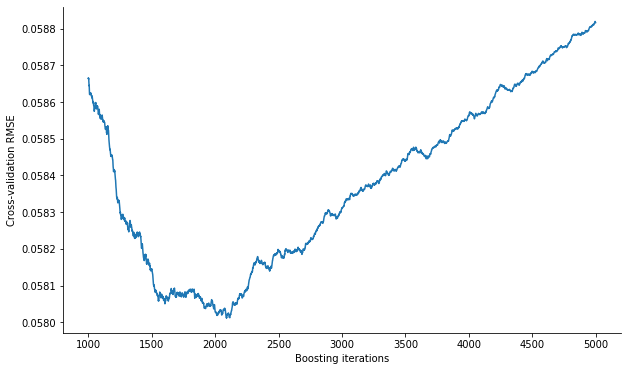

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df.iloc[1000:, 0])
ax.set_ylabel('Cross-validation RMSE')
ax.set_xlabel('Boosting iterations')
sns.despine()
plt.show()